# A not-so-serious introduction to modeling of surface processes
# Hillslope Diffusion
## *Basics*

As geomorphologists we try to describe and explain the geomorphic features we see in the world around us.
But only describing is not useful in terms of making statements about the past and the possible future of a system, so we try to use very annoying things like equations and math in general to explain what is happening in the world around us.

The most simple way to start this task is the so-called 'hillslope diffusion' equation, which explains how sediment is transported down a hillslope by e.g soil creep, rainsplash, etc.. It is assumed that all those processes are in first-order driven by gravity and, like all diffusion processes, are driven by a 'Gradient'. If you think about what gradient in a landscape exists which directly links to gravity? Right, the elevation! So set up the equation.

First we write the equation for the amount of sediment which moves down a hillslope.

$q = -k_{diff} * \frac{dh}{dx}$

with q = sediment flux, k = diffusivity constant and dh/dx beeing the change in elevation = slope

Cool! Now we can calculate some value for q which gives us some value about some stuff that moves down some hill! Nice, isn't it?

q, the sediment flux [$\frac{m^3}{s}$] which tells us how many sediment moves down the slope at any point of the slope (at any value of x).

Now we want to know how much this value of q influences the actual elevation of a hillslope. For this we need to do something that we geomorphologists call a 'mass balance'. A mass balance basically describes "the mass which enters a system and the mass that leaves the system at any point in time" :

*** Input = Output + Accumulation ***

In our case we imagine something, we like to call a ***sandbox model***, only that we use theoretical sand (bits and bytes). When you are in holiday at a nice beach and somebody gives you the task to build up an cube in the sand, what expect you to be the problem? Right, the 'walls' of the cube are going to collapse, because they are not stable. But imagine you do it anyway, you go there, you build up you nice little cube and then you go away, have a beer and forget about it. The next day you come back and what you see is a hump. Your cube with nice flat sharp edges turned into a undefined hump of sand. Thats because it gets 'eroded' away, slowly but steady :
***
![alt text](SandCube.svg.png "Logo Title Text 1")
***
And because there is no sand appearing out of in thin air and raining down on our sandcube, we can assume that the elevation of this area depends on the velocity of sand traveling 'down the cube'. So there is no **Input** and the **Output** would be the sand traveling away from the cube. The model mass balance would look something like this:

The interesting thing about this sandcube for us would be to see how fast it is decaying. How long does it take until the cube got flat?
For this we need to write an equation in which the height of the cube depends on how long the cube is standing there:

$\frac{dh}{dt} = -\frac{dq}{dx} $, 

or in other words : elevation change with time *dh/dt* depends on the change of the sediment flux over time *dq/dt*, so the higher the sediment flux the faster our elevation will drop (the cube will be gone faster).

***
![alt text](SandCube_MassBalance.svg.png "Logo Title Text 1")
***

For this (honestly) very simple example of a mass balance we can think about 3 different scenarios and their outcomes:
1. Input > Output = The sandhump will grow
2. Input < Output = The sandhump will flatten out (our example case)
3. Input == Output = ? Good question. My Guess is that the sandhump will evolve in a specific shape and then just stay this way

One last problem with this stuff, before we start doing some cool plots and calculations (promise!) is this: Normally we don't have any fricking idea about $\frac{dq}{dx}$, so how fast the sediment travels somewhere else or down our sandcube. Those processes happen over such a long timescale and at such a slow rate, that it is nearly impossible to constrain for each landscape. So we could not use the last equation. Good thing is, at te beginning we introduced an equation for q! So, we just combine those two equationd and are ready to rumble: 

(1)  $$q = -k_{diff} * \frac{\partial h}{\partial x}$$

(2)  $$\frac{\partial h}{\partial t} = -\frac{\partial q}{\partial x} $$

(1) + (2) $$\frac{\partial h}{\partial t} = k * \frac{\partial^2h}{\partial x^2}$$


Note that the term on the right is the second-derivative of the topography, which mathematically resembles the curvature. Places with large negative curvature ('Hills') have high values of erosion whereas places with high positive erosion ('valleys') have high values of deposition:

![alt text](CurvaturePng.png "Logo Title Text 1")

So does this mean we can calculate the decay of our sandcube just with the help of the shape of our sandcube?

## *How to 'model' the model*
### Discretization

So now we have an equation which can be used to calculate how the height of our sandbump changes in time and so we are done, right?
Problem is: this is an differential equation, so right now we can't really say something about the overall height. So we use something, we modelers call a "finite-difference-model". Basically we try to write the differential equation as a set of linear equations, using only our "known" variables. 
In order to do this we need to ***"discretize"*** our model: We need to set up specific intervals of time and space at which we want to calculate the height of our sand-bump. To get a clearer grip on how this works, lets look at a figure:

![alt text](xt_space_png.png "Logo Title Text 1")

In this figure x represents space and t represents time. The black-dot in the middle represent our present state. The red dots represent our system either one timestep $\Delta t$ in the future (the upper point) or one timestep $\Delta t$ in the past (the lower point) whereas the green points represent different locations *within* the system we want to model. (In this case it would be very 1-Dimensional). 

You may ask why we are doing this and the most easiest explanation is problably: thats just how computers work. If we can't have a ***"analytical"*** solution for an equation, which basically gives us an result for EVERY point in time and space we need a ***"numerical"*** solution. We calculate the numerical solution by just always assuming we know the present state of a system, then calculating the state one-step in the future, then another step in the future and so on... So in the figure, with each calculation, we would move up along the t-axis.

For our sand-cube example: just imagine putting little green flags (analogous to the green points in the last figure) every 5cm in the cube from one side to the other (so $\Delta x = 5cm$ and watching the cube decay every hour (so $\Delta t = 1hour$)

So how do we do this?

### Taylor Expansion

Remember what you just read about in the last chapter. We calculate something in the future by assuming we know how it is right NOW. We have a function $\frac{dh}{dt} = k * \frac{d^2h}{dx^2}$ which describes how the system will change over time and we have chosen some time-intervall $\Delta t$ over which we want to observe our model. So we can get cracking. What we do now is something that is called a ***Taylor Expansion***. This is rougly a mathematical way to approximate a function, for which we can not find an exact analytical solution, by writing it in terms of an series of an infinite number of terms. How this exactly works is not so important here (if you want to know, there are many good books about this stuff) but for understanding how we get to our 'final' equation later, there are two important equations:

$$h(x + \Delta x) = h(x) + \Delta x \frac{\partial h}{\partial x} + \frac{\Delta x^2}{2} \frac{\partial ^2 h}{\partial x^2}+ \frac{\Delta x^3}{3} \frac{\partial ^3 h}{\partial x^3}+ O(\Delta x^4)$$

$$h(x - \Delta x) = h(x) - \Delta x \frac{\partial h}{\partial x} + \frac{\Delta x^2}{2} \frac{\partial ^2 h}{\partial x^2}\ - \frac{\Delta x^3}{3} \frac{\partial ^3 h}{\partial x^3} + O(\Delta x^4)$$

Think of those two series as equations that describe the system going 'forward' and 'backward' within our model domain (or going one green flag to the right and one green flag to the left on our small sand-cube). Cool thing about those two equations is, that if we add them to each other, all the odd-numbered terms cancel each other out (don't mind this O(x^2) thing at the end, this is a measure of the residual of our approximation because after all it just an approximation)

$$h(x + \Delta x) + h(x - \Delta x) = 2h(x) + \Delta x^2 \frac{\partial^2 h}{\partial x^2} + O(x^2)$$

Now we solve this equation after $\frac{\partial^2 h}{\partial x^2}$ and write $h(x + \Delta x)$ and $h(x - \Delta x)$ as $h_{i+1}$ and $h_{i-1}$ respectively:

$$\frac{\partial^2 h}{\partial x^2} = \frac{h_{i+1} - 2h(x) + h_{i-1}}{\Delta x^2} + O(x^2)$$

so now we have an equation for the second derivative of h after x. Sounds familiar? Think about our standart diffusion again equation : $\frac{\partial h}{\partial t} = k * \frac{\partial^2h}{\partial x^2}$

So now we substitute $\frac{\partial^2 h}{\partial x^2}$ in the diffusion equation and discretize $\frac{\partial h}{\partial t}$ with $\frac{h_{i}^{n+1} + h_{i}^{n}}{\Delta t}$ and drop the correction factor o(x^2):

$$\frac{h_{i}^{n+1}  +  h_{i}^{n}}{\Delta t} = k  \frac{h_{i+1} - 2h(x) + h_{i-1}}{\Delta x^2}$$

But now we still have two unknowns $h_{i}^{n+1}  +  h_{i}^{n}$ on the left hand side of the equation or don't we? An important thing when doing stuff like this is, that in almost all cases we need an idea about the inital state of our system. We call this therefore ***initical conditions (IC)***. Think about our sand-cube example again: What would be the inital state of our system ? It would be the shape and height and of our inital sandcube. This would be our initial condition at the time t = 0, or in mathematical expressions : $u(x,0) = u_o(x)$. This means nothing more than at the point in time t = 0 we now the exact height of the sandcube at any point x, just because we build it this way, so we defined it.

So we assume we know h(x,0) which in this case is nothing else than $h_i^{n}$ and therefore solve the above equation for:

$$ h_i^{n+1} = h_i^{n} + k \frac{\Delta t}{\Delta x^2} (h_{i+1}^n - 2h_{i}^{n} + h_{i-1}^n) $$

So, finally, we are where we wanted to go the whole time. Keep this equation in mind because we are going to use it in our python programm. This is the final solution for our problem, which develops our sandbox with a known initial topography.

## So lets try to put this into python
### First we load a bunch of important modules that we need

In [102]:
#This loads some python moduels that we are going to need for calcs
#and plotting
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib inline

### Now we 'build' a model. We define a few parameters which will define our initial assumptions and material constants

In [106]:
#Length of our model domain in cm.
#In this example our sandcube will be build in the middle of our domain
Length  = 100 

#The spatial resolution (how often do we devide our area?)
dx      = 2./(Length-1)

#How long are we running our model? (in hours)
T       = 5

#The temporal resolution of our model
dt      = dx**2/2

#Out of the maximum time and the timestepduration we get amount of timesteps
n       = int(T/dt)

#Finally some geological values! K is something thats called the 'diffusivity',
#it describes how effective mass moves through a system. (cm^2/h, UNITS MUST BE CONSISTENT!)
K       = 0.005

#Assume we have plate tectonics raising our beach in the air by some value.
#What happens if play around with this? Does this influence the shape of the sandcube?
uplift  = 0.0      #uplift rate cm/h

#Width of our initial sandcube in cm
cube_w  = 20

#Height of our initial sandcube in cm (what happens if this gets negative?)
cube_h   = 2

### This kind of goes into the "meat" of python. Its not so important right now if you dont understand everything. We just "build" up our sandcube

Imagine this to be a cross-section through our sandcube that we build.


/home/manu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


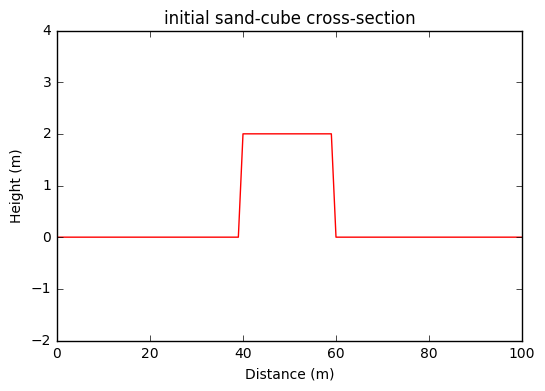

In [107]:
#create domainarray
d   = np.linspace(0,Length,Length+1)
#create elevationarray of sandcube
h   = np.zeros(len(d))   
#build sandcube around middle of model domain. This is our "Inital Condition"
h[len(h)/2-(cube_w/2):len(h)/2+(cube_w/2)]  += cube_h
#Just some plotting
fig1 = plt.figure('initial topography')
ax1  = plt.plot(d,h,'r')
yax1 = plt.ylim([-2,4])
tit1 = plt.title('initial sand-cube cross-section')
xtxt = plt.xlabel("Distance (m)")
ytxt = plt.ylabel("Height (m)")
print('Imagine this to be a cross-section through our sandcube that we build.')

Congratulation! We just calculated and plotted how our sandcube will look after 5 hours. Now you can play with model-duration or diffusion coefficent and see how the system reacts.


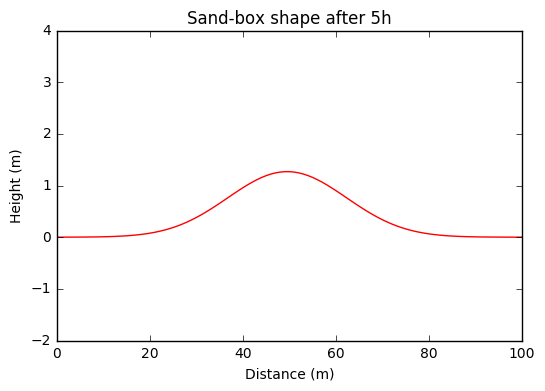

In [108]:
#Set up a second elevation array for saving the "current n-state" of the system
hn = np.ones(Length)
#Loop through every timestep
for j in range(n):
    #After every timestep update the h(n) array
    hn = h.copy()
    #Loop through all the points in the model array. This the 
    for i in range(1,Length-1):
        h[i] = hn[i] + K * dt / dx**2 * (hn[i+1] - 2 * hn[i] + hn[i-1])
    h += uplift #we neglect uplift right now. the beach is not moving
#Plotting again
fig2 = plt.figure('resulting topography')
pl2  = plt.plot(d,h,'r')
yax2 = plt.ylim([-2,4])
tit2 = plt.title('Sand-box shape after {}h'.format(T))
xtxt = plt.xlabel("Distance (m)")
ytxt = plt.ylabel("Height (m)")
print('Congratulation! We just calculated and plotted how our sandcube will look after {} hours. '.format(T)+
'Now you can play with model-duration or diffusion coefficent and see how the system reacts.')   

### This stuff is work in progress. The animations take to long right now. 